# A litany of Pandas Plotting Examples

* Pandas and Matplotlib provide a bunch of visualizations
* 

In [1]:
# load up the libraries we need

%matplotlib inline
import numpy as np              
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")
# Drop the missing values rows
df = df.dropna()
df.head(5)

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,sex,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


## Density Plot

* Visualises the distribution of data over a continuous interval or time period
* A variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. 
* The peaks of a Density Plot help display where values are concentrated over the interval.

https://datavizcatalogue.com/methods/density_plot.html


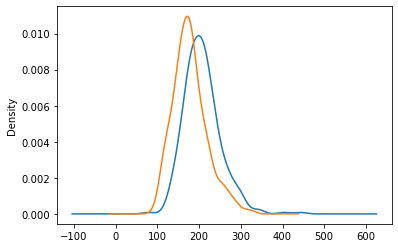

In [3]:
df["chol"].plot.density()
df["weight"].plot.density();

## Box Plot

* A convenient way of visually displaying the data distribution through their quartiles
* The lines extending parallel from the boxes are known as the whiskers and indicate variability outside the upper and lower quartiles. 
* Outliers are sometimes plotted as individual dots that are in-line with whiskers. 


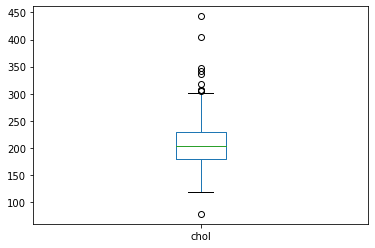

In [4]:
df["chol"].plot.box();

##  Histogram 

* Visualises the distribution of data over a continuous interval or certain time period. 
* Each bar in a histogram represents the tabulated frequency at each interval/bin.
* Help give an estimate as to where values are concentrated, what the extremes are and whether there are any gaps or unusual values. 

https://datavizcatalogue.com/methods/histogram.html



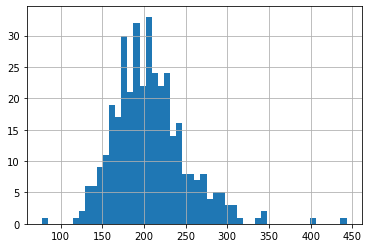

In [5]:
df["chol"].hist(bins=50);

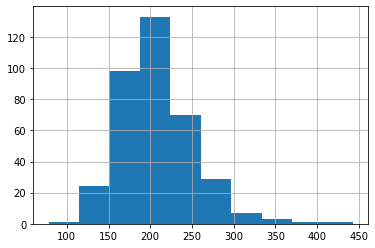

In [6]:
# use the bins parameter to adjust the granularity
df["chol"].hist(bins=10);

## Scatter Plot

* Use a collection of points placed using Cartesian Coordinates to display values from two variables. 
* By displaying a variable in each axis, you can detect if a relationship or correlation between the two variables exists.

https://datavizcatalogue.com/methods/scatterplot.html


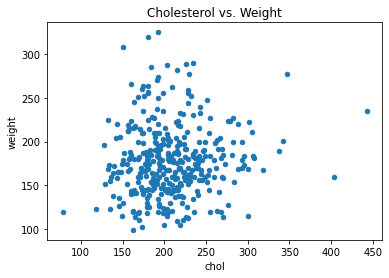

In [7]:
df.plot(kind='scatter', x='chol', y='weight', title="Cholesterol vs. Weight");

/Users/mcburton/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


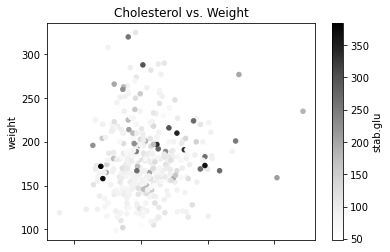

In [8]:
# The c parameter may be given as the name of a column to provide colors for each point
df.plot(kind='scatter', x='chol', y='weight', 
        c='stab.glu', 
        title="Cholesterol vs. Weight");

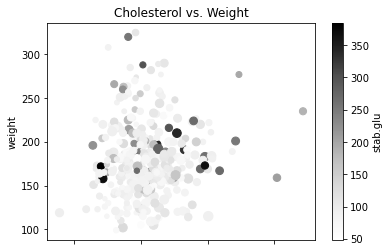

In [9]:
# the s parameter can be used to adjust the size of the points
df.plot(kind='scatter', x='chol', y='weight', 
        c='stab.glu', 
        s=df["age"], 
        title="Cholesterol vs. Weight");

## Scatterplot Matrix

Scatterplot matrices are a great way to roughly determine if you have a linear correlation between multiple variables. This is particularly helpful in pinpointing specific variables that might have similar correlations. https://www.r-bloggers.com/scatterplot-matrices/

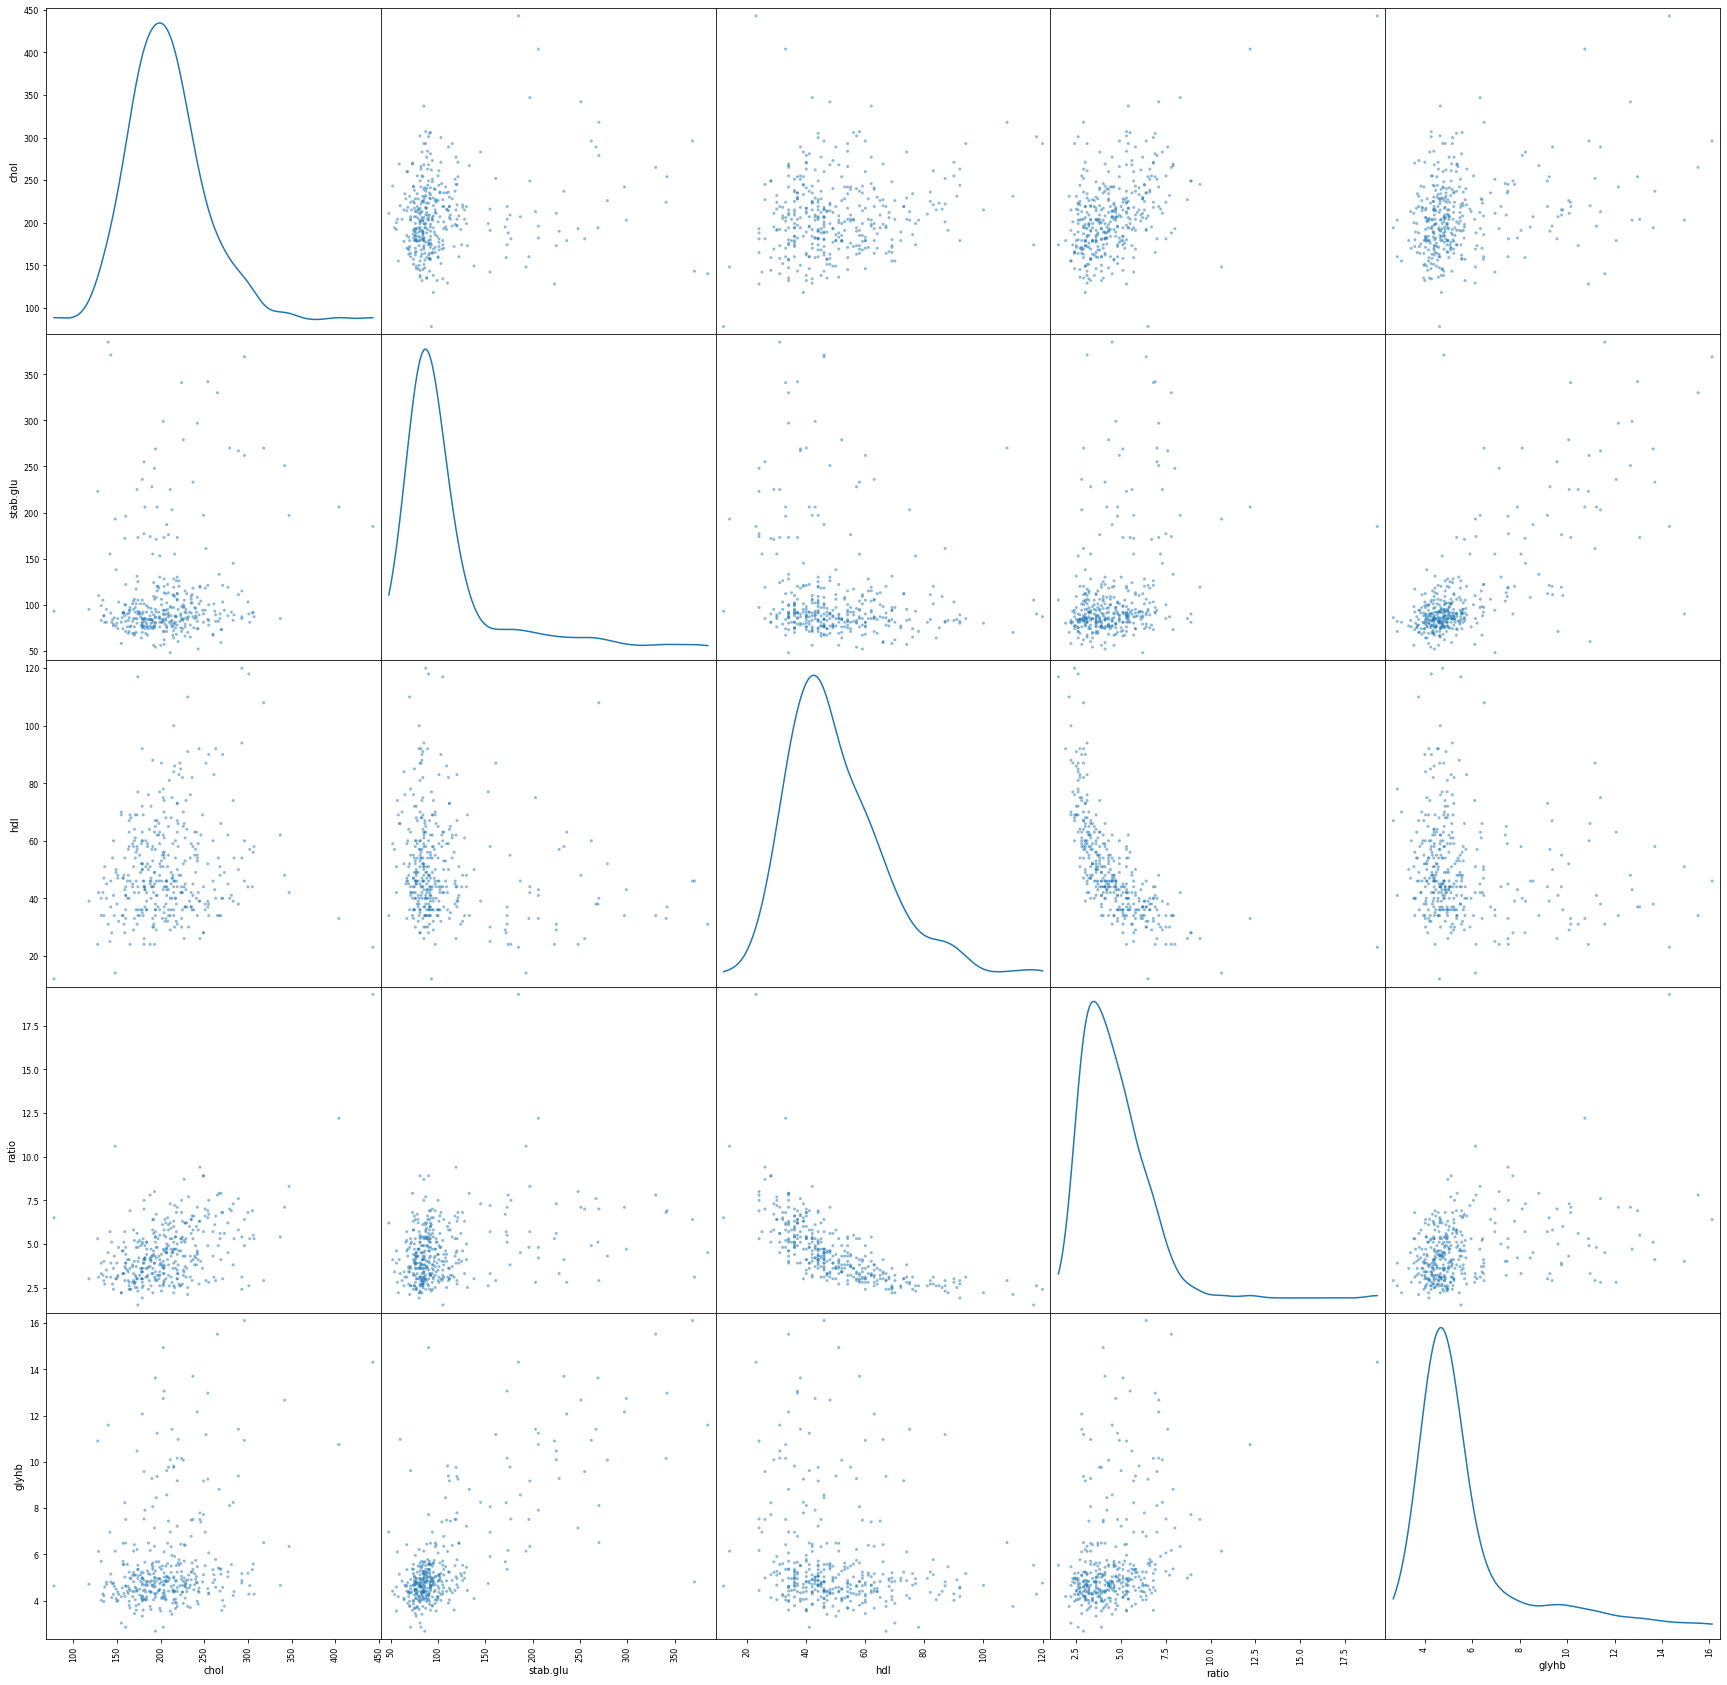

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb']], # Make a scatter matrix of all columns
               figsize=(30, 30), # Set plot size
               diagonal='kde');  # Show distribution estimates on diagonal

## Bubble Chart

* Uses a Cartesian coordinate system to plot points along a grid where the X and Y axis are separate variables.
* Each point is assigned a label or category 
* Each plotted point then represents a third variable by the area of its circle. 
* Colours can be used to distinguish between categories or used to represent an additional data variable. 
* Used to compare and show the relationships between categorised circles, by the use of positioning and proportions. 
* The overall picture can be use to analyse for patterns/correlations.




/Users/mcburton/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


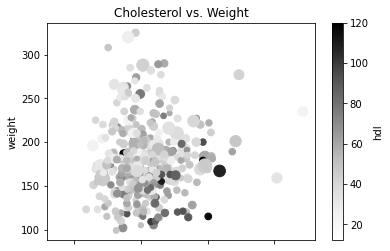

In [11]:
df.plot(kind='scatter', x='chol', y='weight', 
        c='hdl', 
        s=df['stab.glu'] / 2, 
        title="Cholesterol vs. Weight");

## Hexbin Plot 


* Hexbin plots can be a useful alternative to scatter plots or bubble charts if your data are too dense to plot each point individually.


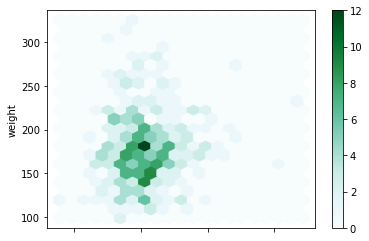

In [12]:
# generate a hexbin plot
df.plot.hexbin(x='chol', y='weight', gridsize=20);


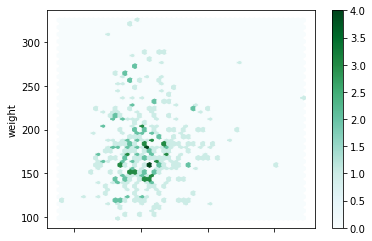

In [13]:
# use the gridsize parameter to adjust the granularity
df.plot.hexbin(x='chol', y='weight', gridsize=50);

## Bar Chart

* Uses either horizontal or vertical bars to show discrete, numerical comparisons across categories. 
* One axis of the chart shows the specific categories being compared and the other axis represents a discrete value scale.
* Distinguished from Histograms as they do not display continuous developments over an interval. 
* Bar Chart's discrete data is categorical data and therefore answers the question of "how many?" in each category.

https://datavizcatalogue.com/methods/bar_chart.html


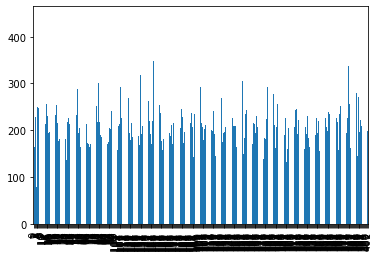

In [14]:
# For continuous data:

df["chol"].plot.bar();

* ACK! that isn't very useful.

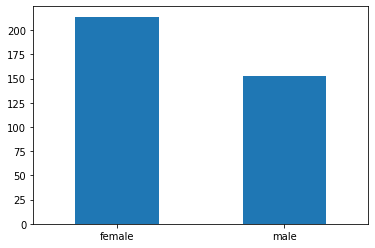

In [15]:
# For discrete data
df["sex"].value_counts().sort_index().plot(kind='bar', rot=0);

## RadViz

* RadViz is a way of visualizing multi-variate data. 
* It is based on a simple spring tension minimization algorithm. 
* Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. 
* You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). 
* The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. 
* Depending on which class that sample belongs it will be colored differently.

https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-radviz


In [16]:
iris_data = pd.read_csv("iris.csv")
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/Users/mcburton/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:147: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=[-1, 1], ylim=[-1, 1])


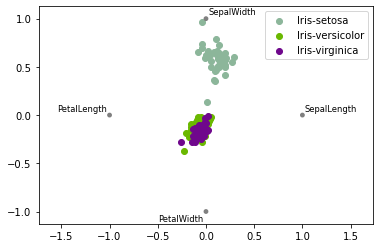

In [17]:
from pandas.plotting import radviz
radviz(iris_data, 'Name');

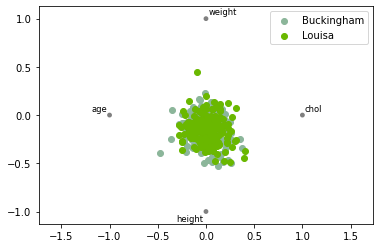

In [18]:
radviz(df[["chol", "weight", "age", "height", "location"]], "location");

##  Parallel Coordinates Plot 

* Used for plotting multivariate, numerical data. 
* Ideal for comparing many variables together and seeing the relationships between them. 
* Examples:
    * Comparing computer or cars specs across different models
    * Comparing drug efficacy across patient cohorts
* Each variable is given its own axis and all the axes are placed in parallel to each other. 
* Each axis can have a different scale, as each variable works off a different unit of measurement, or all the axes can be normalised to keep all the scales uniform.
* Values are plotted as a series of lines that connected across all the axes. 

https://datavizcatalogue.com/methods/parallel_coordinates.html

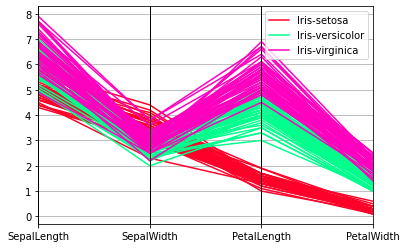

In [19]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris_data, 'Name', colormap='gist_rainbow');


## Pie Chart 

* Yup, you can make them.

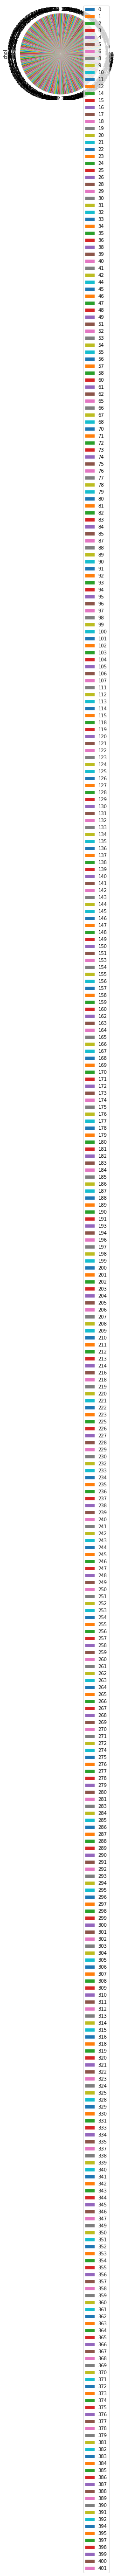

In [20]:
# For continuous data (pretty useless)
df[["chol"]].plot.pie(y='chol', subplots=False, figsize=(8, 4));

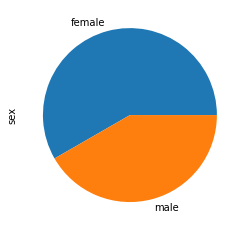

In [21]:
# For discrete data
df["sex"].value_counts().sort_index().plot.pie(y='sex', 
                                                  subplots=False, 
                                                  figsize=(8, 4));

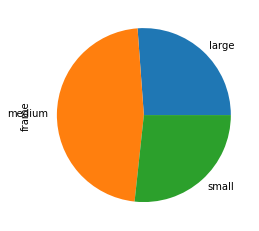

In [22]:
# For discrete data
df["frame"].value_counts().sort_index().plot.pie(y='sex', 
                                                 subplots=False, 
                                                 figsize=(8, 4));